單對單
https://wenwender.wordpress.com/2019/10/18/%E5%AF%A6%E4%BD%9C%E9%80%8F%E9%81%8Elstm%E9%A0%90%E6%B8%AC%E8%82%A1%E7%A5%A8/

多對單

https://www.twblogs.net/a/5efe6fbb99927402d4fc9d44

標準化
https://blog.csdn.net/sinat_33761963/article/details/53433799

StandardScaler()
https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix

In [1]:
!pip install FinMind

     |████████████████████████████████| 48 kB 2.5 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 785 kB 22.8 MB/s 
     |████████████████████████████████| 789 kB 44.9 MB/s 
     |████████████████████████████████| 280 kB 62.7 MB/s 
     |████████████████████████████████| 8.6 MB 17.4 MB/s 
     |████████████████████████████████| 6.3 MB 50.6 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 1.3 MB 43.8 MB/s 
     |████████████████████████████████| 135 kB 47.3 MB/s 
     |████████████████████████████████| 142 kB 55.8 MB/s 
     |████████████████████████████████| 294 kB 57.8 MB/s 
     |████████████████████████████████| 133 kB 61.8 MB/s 
     |████████████████████████████████| 288 kB 60.4 MB/s 
     |████████████████████████████████| 370 kB 49.5 MB/s 
     |████████████████████████████████| 129 kB 55.1 MB/s 
  Created wheel for ta: filename=ta-0.5.25-py3-none-any.whl size=24879 sha256=

In [2]:
from FinMind.data import DataLoader

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
TaiwanTaiwanStockInfoInfo = DataLoader()
data  = DataLoader.taiwan_stock_daily_adj(TaiwanTaiwanStockInfoInfo,stock_id=2330, start_date='2020-01-01', end_date='2021-09-25')
data = data.drop(columns=['date','stock_id','Trading_Volume','spread','Trading_turnover'])

data1 = data.copy()
# test1 圖表顯示用
test1 = data1.iloc[-110:, :].values
print(test1.shape)

(110, 5)


In [18]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
#需將資料做reshape的動作，使其shape為(資料長度,1) 
data.iloc[:] = sc.fit_transform(data.iloc[:])

sc.transform(data)
data.head()


,Trading_money,open,max,min,close
0,-0.551486,-1.051779,-1.064726,-1.091528,-1.083437
1,-0.480094,-1.135205,-1.143834,-1.118310,-1.140330
2,-0.336297,-1.138997,-1.155135,-1.160397,-1.159294
3,-0.692825,-1.195879,-1.155135,-1.171875,-1.159294
4,-0.817177,-1.120037,-1.121232,-1.106832,-1.098609


In [19]:
features = data.shape[1]
timesteps = 5

In [20]:
#切分train,Test集
train = data.iloc[:-110, :].values
test = data.iloc[-110:, :].values
print(test.shape)
print(train.shape)
#只要open high
train_set = train
test_set = test

# test1 = data1.iloc[-110:, :].values


print(test_set[-1])

(110, 5)
(310, 5)
[-0.86413325  1.00813421  1.02895725  1.04388714  1.06630905]


In [21]:
# train
X_train = [] 
y_train = []
for i in range(timesteps,len(train_set)):
    X_train.append(train_set[i-timesteps:i, :]) 
    y_train.append(train_set[i, -1]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
print(X_train.shape)
X_train = np.reshape(X_train, 
                         (X_train.shape[0], X_train.shape[1], features))

                      

(305, 5, 5)


In [22]:
# test
X_test = [] 
y_test = []
for i in range(timesteps,len(test_set)):
    X_test.append(test_set[i-timesteps:i, :]) 
    y_test.append(test_set[i, -1]) 
X_test, y_test = np.array(X_test), np.array(y_test) 
print(X_test.shape)
print(y_test.shape)
X_test = np.reshape(X_test, 
                         (X_test.shape[0], X_test.shape[1], features))

(105, 5, 5)
(105,)


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout,BatchNormalization
keras.backend.clear_session()
regressor = Sequential()
regressor.add(GRU(units = 100,return_sequences=True, input_shape = (X_train.shape[1], features),activation='relu'))
regressor.add(Dropout(0.5))
regressor.add(GRU(units = 100,activation='relu'))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/10
20/20 [==============================] - 3s 11ms/step - loss: 0.3137
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0520
Epoch 3/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0217
Epoch 4/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0206
Epoch 5/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0227
Epoch 6/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0213
Epoch 7/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 8/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 9/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0202
Epoch 10/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0188


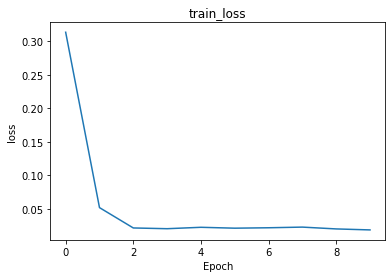

In [24]:
history = regressor.fit(X_train, y_train, epochs = 10, batch_size = 16)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

In [25]:
'''
dataset_total = pd.concat((pd.Series(train[:,-1]), pd.Series(test[:,-1])), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
print(dataset_total)

inputs = inputs.reshape(-1,5)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
'''
predicted_stock_price = regressor.predict(X_test)


print(predicted_stock_price.shape)

predicted_stock_price = predicted_stock_price.reshape(-1,features)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price.reshape(-1,)
predicted_stock_price.tolist()
print(type(predicted_stock_price))
print(predicted_stock_price)

(105, 1)
<class 'numpy.ndarray'>
[3.4567295e+10 5.9552118e+02 6.0029449e+02 5.9240546e+02 5.9786658e+02
 3.4765873e+10 5.9196362e+02 5.9284558e+02 5.8154456e+02 5.8546759e+02
 3.3719192e+10 5.8477820e+02 5.8219305e+02 5.6309937e+02 5.6019720e+02
 3.1144860e+10 5.6236664e+02 5.6828235e+02 5.6054449e+02 5.6505566e+02
 3.1984134e+10 5.7130231e+02 5.8102734e+02 5.7496826e+02 5.8379272e+02
 3.3737888e+10 5.8637537e+02 5.9337726e+02 5.8257251e+02 5.8542499e+02
 3.3486301e+10 5.8118903e+02 5.8699963e+02 5.8079138e+02 5.9084070e+02
 3.4653528e+10 5.9672778e+02 6.0432812e+02 5.9337286e+02 5.9323840e+02
 3.4232218e+10 5.8808636e+02 5.9014337e+02 5.7874377e+02 5.8659308e+02
 3.4219512e+10 5.9010101e+02 5.9192627e+02 5.8216876e+02 5.8595691e+02
 3.3661049e+10 5.8464551e+02 5.8857263e+02 5.8132068e+02 5.9161102e+02
 3.4972078e+10 6.0060449e+02 6.0646796e+02 5.9295496e+02 5.8959698e+02
 3.3600934e+10 5.8207843e+02 5.8565704e+02 5.7604645e+02 5.7968481e+02
 3.3178227e+10 5.7964825e+02 5.8281854e+02 5

In [26]:
'''
dataset_total = pd.concat((pd.Series(train[:,-1]), pd.Series(test[:,-1])), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
print(dataset_total)

inputs = inputs.reshape(-1,5)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
'''
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price1 = []
for i in predicted_stock_price:
  predicted_stock_price1.append([0., 0., 0., 0., i])

predicted_stock_price1 = np.array(predicted_stock_price1)

#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price1)
predicted_stock_price2 = []
for i in predicted_stock_price:
  predicted_stock_price2.append(i[-1])
predicted_stock_price = predicted_stock_price2
predicted_stock_price = np.asarray(predicted_stock_price)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


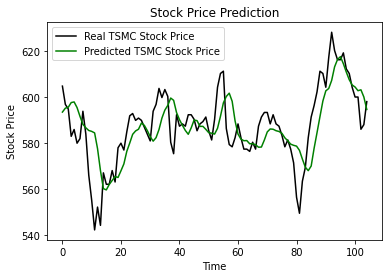

In [27]:
plt.plot(test1[timesteps:,-1], color = 'black', label = 'Real TSMC Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TSMC Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')

